## Task: Laptop Price Prediction

## Objective:
The primary objective is to accurately predict the market price of a laptop based on its attributes 

### Tools Preparation and Libraries:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [3]:
# Load the data set
data = pd.read_csv('laptopPrice.csv')
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


### Exploratory Data Analysis

In [4]:
# Overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
# Check the data types
data.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [6]:
# Target value selling_price 
data['Price'].value_counts()

Price
64990     15
59990     15
79990     13
99990     13
39990     12
          ..
172090     1
74500      1
53400      1
71090      1
57490      1
Name: count, Length: 405, dtype: int64

In [7]:
# Check the missing value 
data.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [8]:
# Summary of descriptive statistics for the columns
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [13]:
data = pd.get_dummies(data, drop_first=True)
data

,Price,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,38999,65,5,False,False,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
2,39999,8,1,False,False,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
3,69990,0,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
4,26990,0,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,135990,0,0,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
819,144990,0,0,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
820,149990,0,0,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
821,142990,0,0,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


### Data Visualization

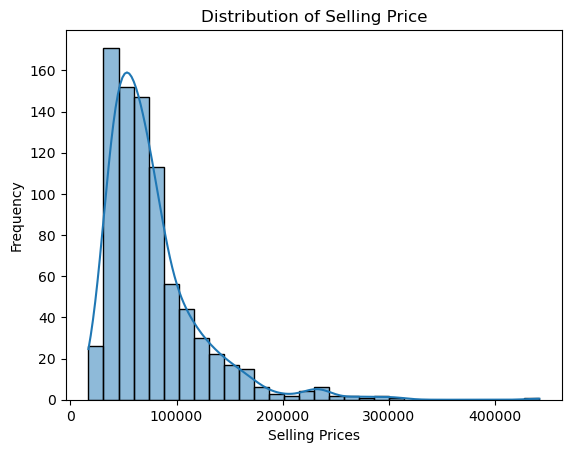

In [14]:
# Visualize the distribution of selling price(target variabel)
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Prices')
plt.ylabel('Frequency')
plt.show()

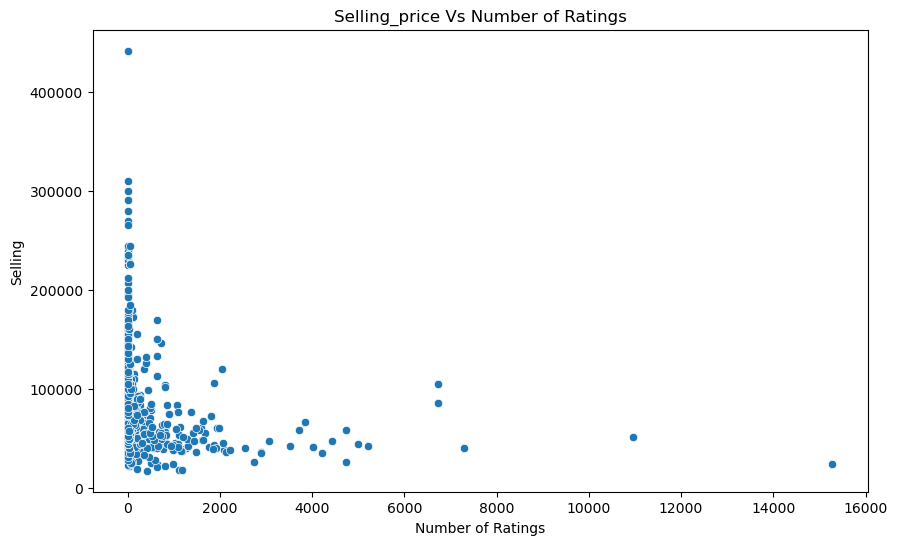

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Number of Ratings',y='Price', data=data)
plt.title('Selling_price Vs Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Selling');

### Model Building

In [36]:
# Split the dataset into features (X) and target (y)
X = data.drop('Price',axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
from sklearn.ensemble import GradientBoostingRegressor
# Train a GradientBoostingRegressor model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Model Evaluation

In [37]:
# Make predictions
y_pred = gb_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

from sklearn import metrics
print('R-2', metrics.r2_score(y_test,y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R-2 0.8116643168029083
Mean Absolute Error: 12119.954562512847
Root Mean Squared Error: 21312.73661110586


### Comparing Actual vs Predicted:

In [38]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data 

,Actual,Predicted
293,55490,57973.808762
169,33990,35702.393168
457,58990,71852.161611
63,42490,47158.391541
337,73990,82898.117322
...,...,...
358,73990,71601.395816
32,37990,39294.410737
666,49990,59521.462093
678,64990,63466.419745
